## these are the objective that are to be achieved 
### 1.Understand the Distribution of Patient Ages and Genders 
Analyze the age and gender distribution of patients to identify the demographic profile of those undergoing medical tests. 
### 2. Identify the Most Common Tests Conducted 
Determine which medical tests (e.g., Thyroid Profile, Complete Blood Picture, Random Blood Glucose) are most frequently performed across facilities.
### 3. Analyze Blood Sugar Levels Across Facilities 
Examine the distribution and outliers of blood sugar levels (Fasting, Random, Post Lunch) to identify potential health risks like diabetes.
### 4.Evaluate Facility-Wise Testing Patterns 
Compare the number of tests and types of tests conducted at different facilities (e.g., Anganwadi Centre, Ameerpet PHC) to assess facility performance or focus areas. 
### 5. Assess Thyroid Function Trends (TSH, T3, T4) 
Analyze thyroid-related metrics (TSH, T3, T4) to understand prevalence of thyroid disorders among the population. on pyhton give separate code for each 

In [ ]:
# OBJECTIVE 1

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Load the data
df = pd.read_csv('Telangana_Diagnostics_Data_2020_09.csv')
# print(df.head())
df.columns

Index(['year', 'month', 'District', 'Mandal Name', 'Village Name',
       'FACILITY_NAME', 'Age', 'Gender', 'Test Names', 'Blood sugar',
       'Bilirubin (T)', 'Bilirubin direct', 'Serum creatinine', 'Blood Urea',
       'SGPT', 'SGOT', 'Alkaline Phosphatase', 'Total Protein',
       'Albumin & AG ratio', 'Uric acid', 'Glycosylated hemoglobin (HbA1C)',
       'TSH (including for new-born screening)', 'T3', 'T4', 'Vitamin B12',
       'Vitamin D', 'Hemoglobin', 'Total leucocyte count',
       'Differential leucocyte count', 'Platelet count',
       'Total Red blood cell count', 'HCT', 'MCV', 'Blood grouping'],
      dtype='object')

In [6]:
# Analyze age distribution
print("1. Distribution of Patient Ages and Genders:")
print("Summary Statistics of Age:")
print(df['Age'].describe())


1. Distribution of Patient Ages and Genders:
Summary Statistics of Age:
count    1484.000000
mean       37.315364
std        14.356890
min         1.000000
25%        26.000000
50%        35.000000
75%        47.000000
max        96.000000
Name: Age, dtype: float64


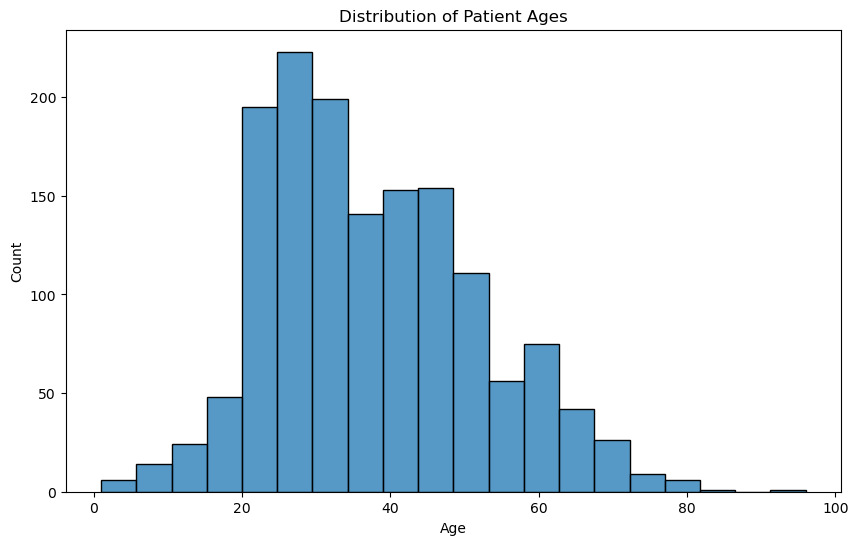

In [7]:
# Plot age distribution
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Age', bins=20)
plt.title('Distribution of Patient Ages')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()


In [8]:
# Analyze gender distribution
print("\nGender Distribution:")
print(df['Gender'].value_counts())


Gender Distribution:
Gender
Female    1197
Male       287
Name: count, dtype: int64


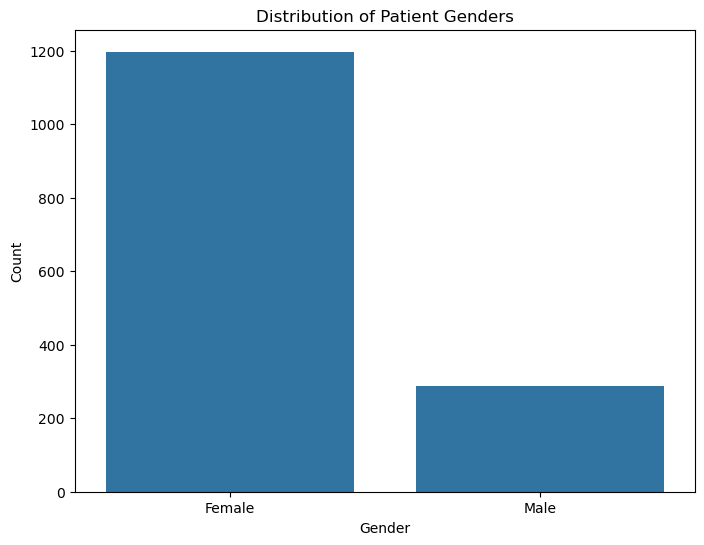

In [9]:
# Plot gender distribution
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Gender', order=df['Gender'].value_counts().index)
plt.title('Distribution of Patient Genders')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

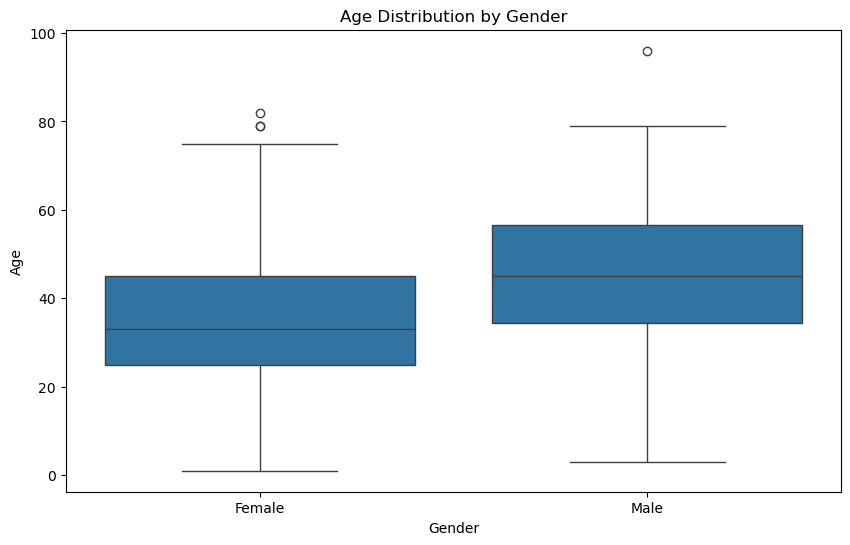

In [10]:
# Age distribution by gender
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Gender', y='Age')
plt.title('Age Distribution by Gender')
plt.xlabel('Gender')
plt.ylabel('Age')
plt.show()

In [11]:
# OBJECTIVE 2

In [12]:
# Identify common tests
print("2. Most Common Tests Conducted:")
test_counts = df['Test Names'].str.split(',').explode().value_counts()
print("Top 10 Most Common Tests:")
print(test_counts.head(10))

2. Most Common Tests Conducted:
Top 10 Most Common Tests:
Test Names
Complete Blood Picture             1098
Thyroid Profile                     868
Random Blood Glucose                516
Renal Function Test                 436
Liver Function Test                 399
Lipid Profile                       381
Fasting Blood Glucose               348
HbA1c                               309
Calcium                             302
Thyroid stimulating hormone (T)     174
Name: count, dtype: int64


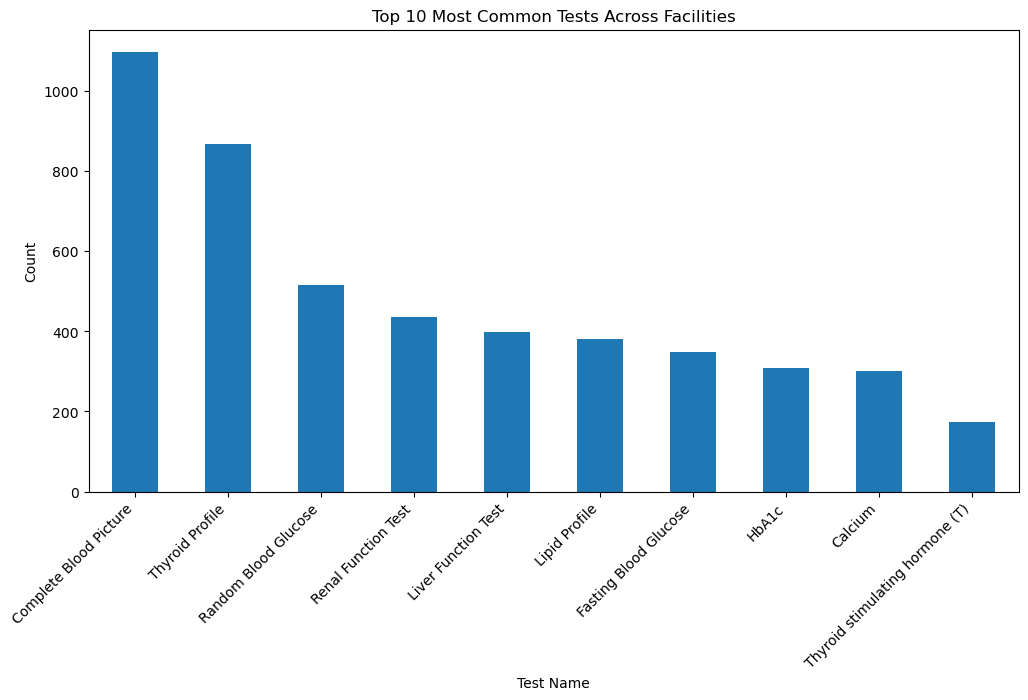

In [13]:
# Plot top 10 most common tests
plt.figure(figsize=(12, 6))
test_counts.head(10).plot(kind='bar')
plt.title('Top 10 Most Common Tests Across Facilities')
plt.xlabel('Test Name')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show()

In [14]:
# OBJECTIVE 3

In [22]:
blood_sugar_cols = ['Fasting Blood Glucose', 'Random Blood Glucose', 'Post Lunch Blood Glucose', 'Blood sugar']
available_cols = [col for col in blood_sugar_cols if col in df.columns]
print("Available Blood Sugar Columns:", available_cols)
blood_sugar_values = pd.concat(
    [pd.to_numeric(df[col], errors='coerce').dropna() for col in available_cols],
    ignore_index=True
)

Available Blood Sugar Columns: ['Blood sugar']


In [21]:
print("3. Analysis of Blood Sugar Levels Across Facilities:")
print("Summary Statistics of Blood Sugar Levels:")
print(blood_sugar_values.describe())

3. Analysis of Blood Sugar Levels Across Facilities:
Summary Statistics of Blood Sugar Levels:
count    517.000000
mean     121.998066
std       65.370426
min       68.000000
25%       88.000000
50%       98.000000
75%      124.000000
max      576.000000
Name: Blood sugar, dtype: float64


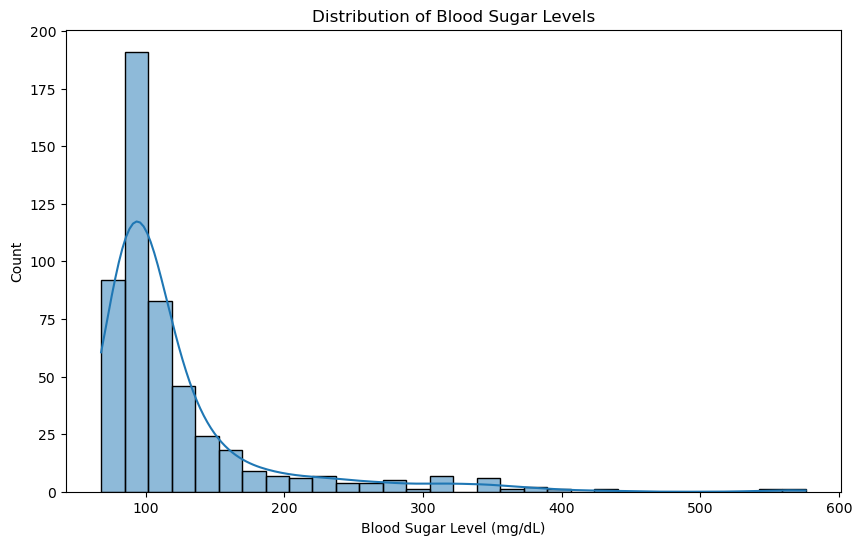

In [20]:
# Plot distribution of blood sugar levels
plt.figure(figsize=(10, 6))
sns.histplot(data=blood_sugar_values, bins=30, kde=True)
plt.title('Distribution of Blood Sugar Levels')
plt.xlabel('Blood Sugar Level (mg/dL)')
plt.ylabel('Count')
plt.show()

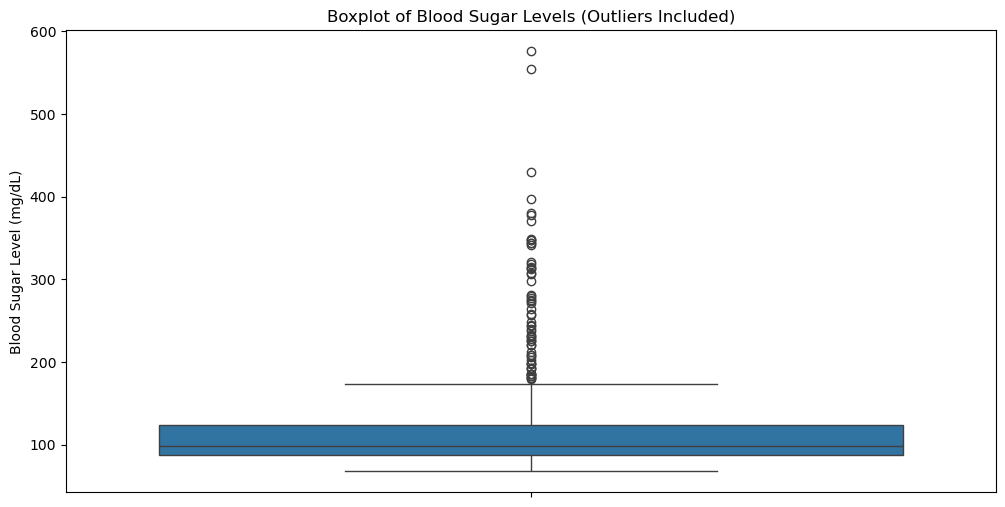

In [17]:
# Box plot to identify outliers
plt.figure(figsize=(12, 6))
blood_sugar_df = pd.DataFrame({'Blood Sugar': blood_sugar_values})
sns.boxplot(data=blood_sugar_df, y='Blood Sugar')
plt.title('Boxplot of Blood Sugar Levels (Outliers Included)')
plt.ylabel('Blood Sugar Level (mg/dL)')
plt.show()

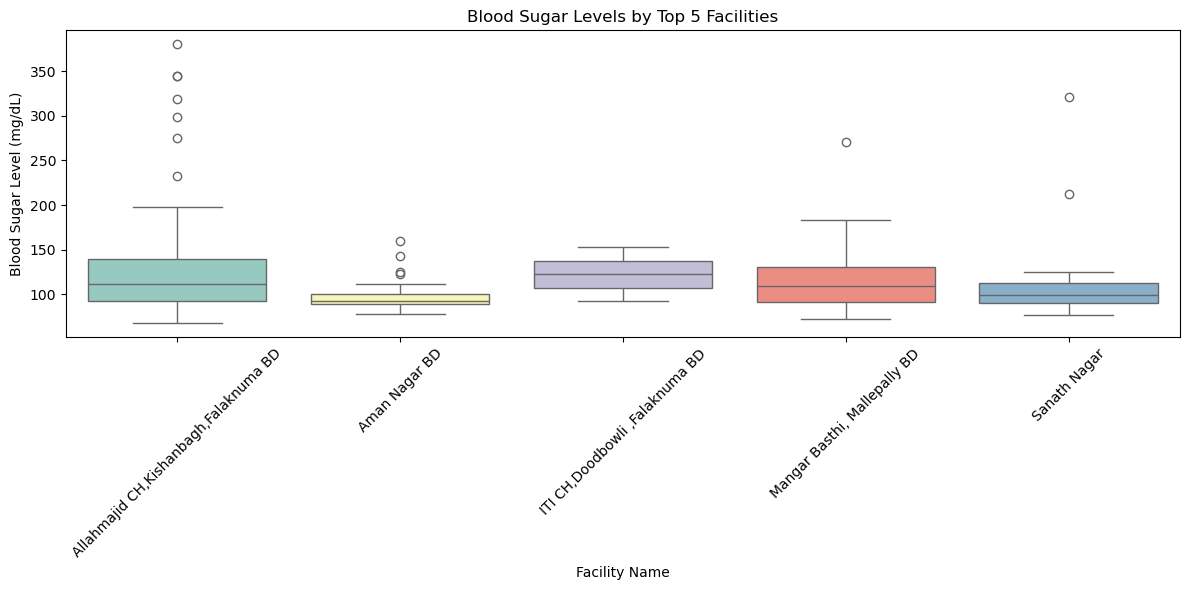

In [19]:
# Box plot by facility (top 5 facilities)
top_facilities = df['FACILITY_NAME'].value_counts().head(5).index
filtered_df = df[df['FACILITY_NAME'].isin(top_facilities)]
# Match facility data with blood sugar values
facility_blood_sugar = pd.concat([filtered_df[col].dropna() for col in available_cols if col in filtered_df.columns])
if not facility_blood_sugar.empty:
    # Create a DataFrame with facility and blood sugar values
    facility_names = filtered_df['FACILITY_NAME'].reindex(facility_blood_sugar.index).dropna()
    facility_blood_sugar_df = pd.DataFrame({
        'Blood Sugar': facility_blood_sugar,
        'Facility': facility_names
    }).dropna()

    plt.figure(figsize=(12, 6))
    sns.boxplot(data=facility_blood_sugar_df, x='Facility', y='Blood Sugar', hue='Facility', palette='Set3', legend=False)
    plt.title('Blood Sugar Levels by Top 5 Facilities')
    plt.xlabel('Facility Name')
    plt.ylabel('Blood Sugar Level (mg/dL)')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
else:
    print("No blood sugar data available for top facilities.")

In [ ]:
# OBJECTIVE 4

In [29]:
# Analyze facility-wise testing patterns
print("4. Facility-Wise Testing Patterns:")
facility_test_counts = df['FACILITY_NAME'].value_counts()
print("Number of Tests by Facility:")
print(facility_test_counts.head(10))

4. Facility-Wise Testing Patterns:
Number of Tests by Facility:
FACILITY_NAME
Mangar Basthi, Mallepally BD             102
Allahmajid CH,Kishanbagh,Falaknuma BD     87
Sanath Nagar                              53
Aman Nagar BD                             51
ITI CH,Doodbowli ,Falaknuma BD            43
Muthyal Bagh BD                           37
Malladi Thaleem, Puranapool BD            36
Tukaram Gate                              34
Yakutpura-1                               28
Kalander Nagar CH Old Malakpet BD         27
Name: count, dtype: int64


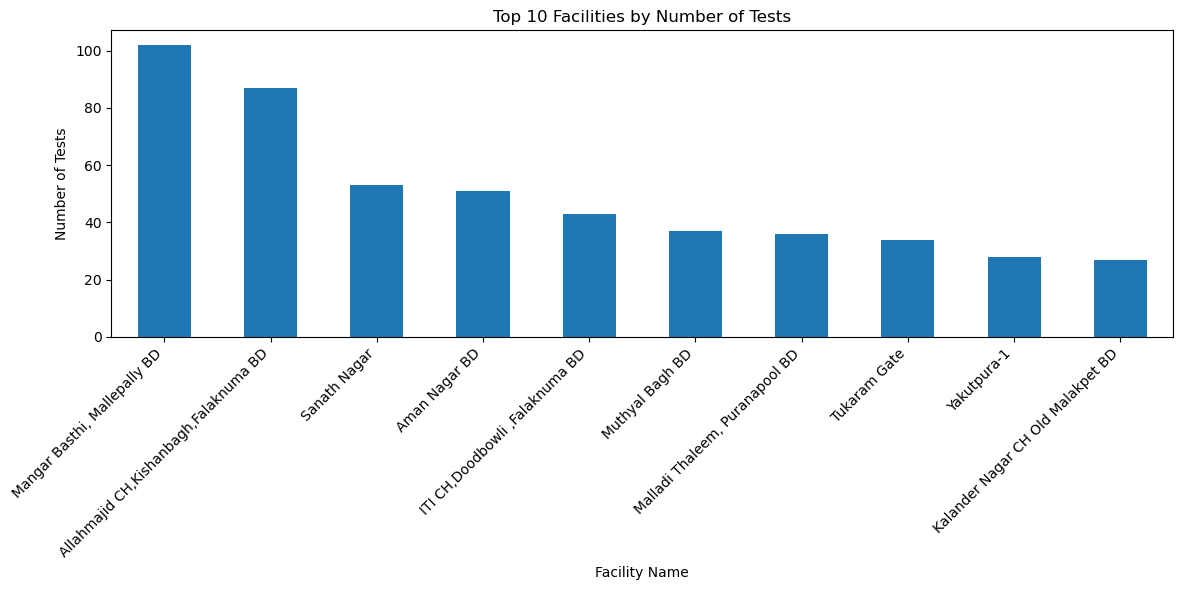

In [25]:
# Plot top 10 facilities by number of tests
plt.figure(figsize=(12, 6))
facility_test_counts.head(10).plot(kind='bar')
plt.title('Top 10 Facilities by Number of Tests')
plt.xlabel('Facility Name')
plt.ylabel('Number of Tests')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [27]:
# Analyze test types by facility (example for top 5 facilities)
top_facilities = facility_test_counts.head(5).index
for facility in top_facilities:
    facility_tests = df[df['FACILITY_NAME'] == facility]['Test Names'].str.split(',').explode().value_counts()
    print(f"\nMost Common Tests at {facility}:")
    print(facility_tests.head(5))


Most Common Tests at Mangar Basthi, Mallepally BD:
Test Names
Complete Blood Picture             100
Thyroid stimulating hormone (T)     54
Calcium                             40
COMPLETE URINE EXAMINATION          36
Alkaline Phosphatase                34
Name: count, dtype: int64

Most Common Tests at Allahmajid CH,Kishanbagh,Falaknuma BD:
Test Names
Thyroid stimulating hormone (T)    61
Complete Blood Picture             60
Random Blood Glucose               51
Lipid Profile                       9
Renal Function Test                 7
Name: count, dtype: int64

Most Common Tests at Sanath Nagar:
Test Names
Complete Blood Picture            45
Thyroid Profile                   32
Random Blood Glucose              29
Rapid Plasma Reagin Test (RPR)    11
Calcium                            7
Name: count, dtype: int64

Most Common Tests at Aman Nagar BD:
Test Names
Thyroid Profile           40
Random Blood Glucose      29
Complete Blood Picture    21
Renal Function Test       19
Liver 

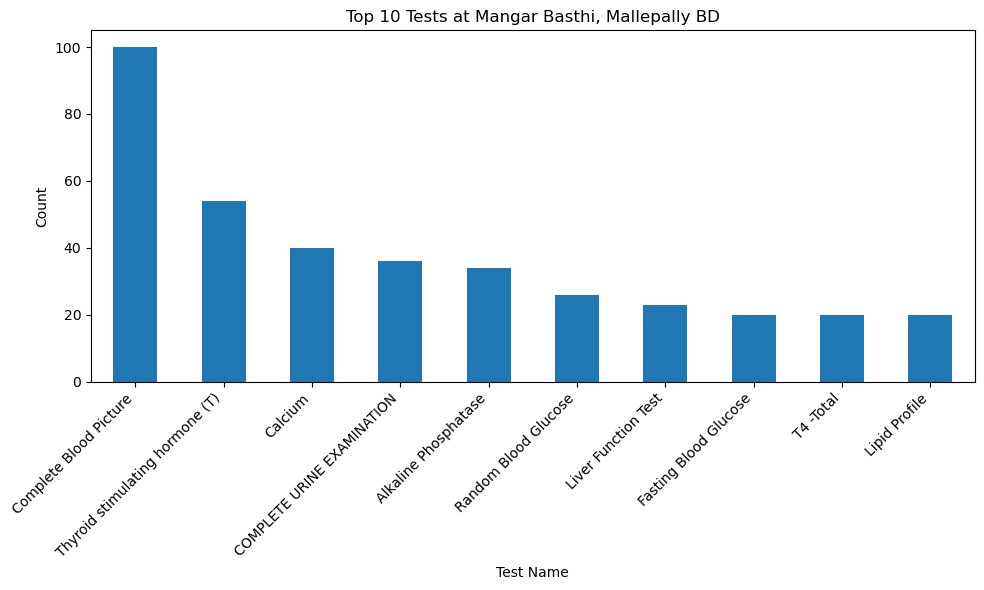

In [28]:
# Plot test distribution for top facility as example
top_facility = top_facilities[0]
top_facility_tests = df[df['FACILITY_NAME'] == top_facility]['Test Names'].str.split(',').explode().value_counts()

plt.figure(figsize=(10, 6))
top_facility_tests.head(10).plot(kind='bar')
plt.title(f'Top 10 Tests at {top_facility}')
plt.xlabel('Test Name')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [ ]:
# OBJECTIVE 5

In [35]:
# Focus on thyroid metrics
thyroid_cols = ['TSH (including for new-born screening)', 'T3', 'T4']
print("5. Thyroid Function Trends Analysis:")
print("Summary Statistics of Thyroid Metrics:")
for col in thyroid_cols:
    if col in df.columns:
        print(f"\n{col}:")
        print(df[col].describe())

5. Thyroid Function Trends Analysis:
Summary Statistics of Thyroid Metrics:

TSH (including for new-born screening):
count    882.000000
mean       8.364853
std        2.661004
min        0.100000
25%        6.700000
50%        7.900000
75%        9.600000
max       22.700000
Name: TSH (including for new-born screening), dtype: float64

T3:
count    883.000000
mean       1.108822
std        0.368909
min        0.010000
25%        0.870000
50%        1.030000
75%        1.240000
max        2.640000
Name: T3, dtype: float64

T4:
count    882.000000
mean       8.364853
std        2.661004
min        0.100000
25%        6.700000
50%        7.900000
75%        9.600000
max       22.700000
Name: T4, dtype: float64


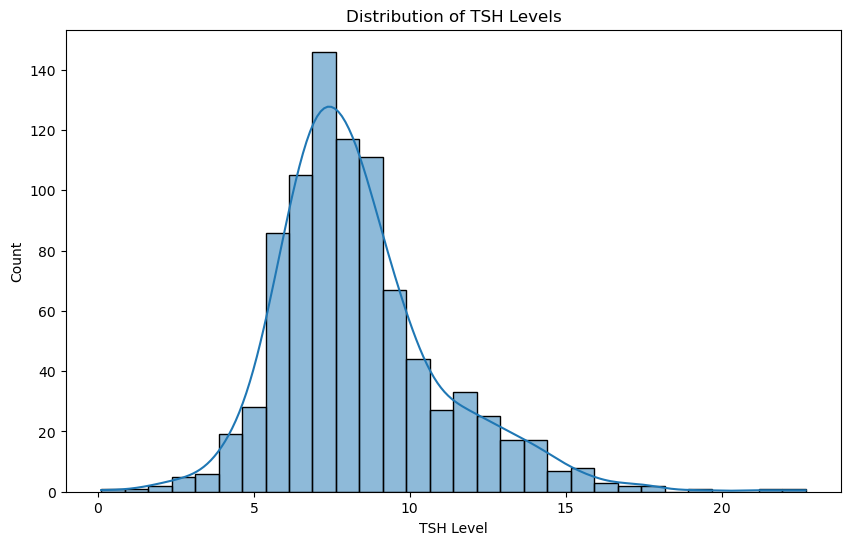

In [31]:
# Plot distribution of TSH
if 'TSH (including for new-born screening)' in df.columns:
    plt.figure(figsize=(10, 6))
    sns.histplot(data=df['TSH (including for new-born screening)'].dropna(), bins=30, kde=True)
    plt.title('Distribution of TSH Levels')
    plt.xlabel('TSH Level')
    plt.ylabel('Count')
    plt.show()

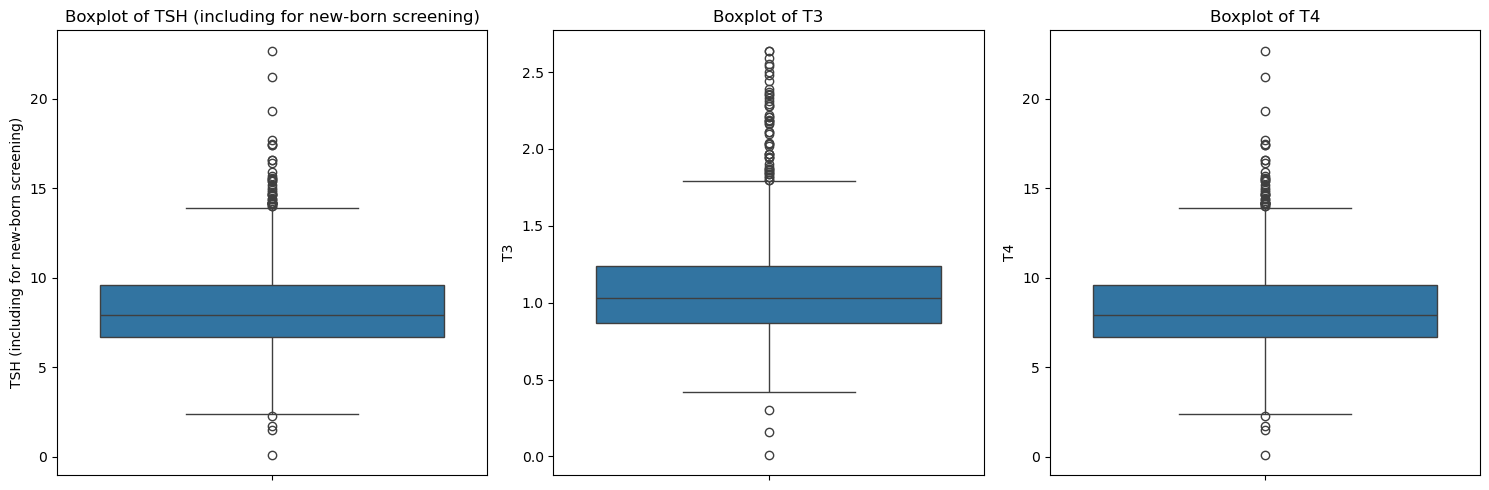

In [32]:
# Box plots for all thyroid metrics
plt.figure(figsize=(15, 5))
for i, col in enumerate([x for x in thyroid_cols if x in df.columns], 1):
    plt.subplot(1, 3, i)
    sns.boxplot(data=df, y=col)
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()

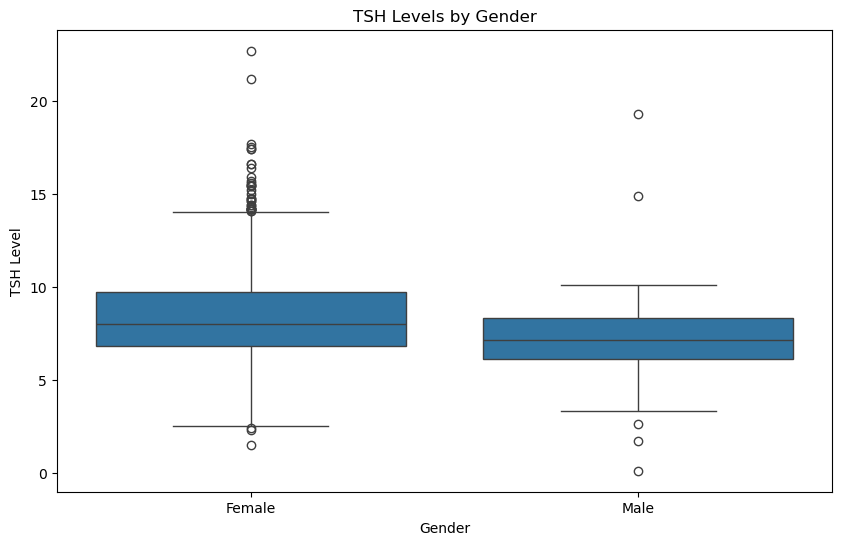

In [33]:
# Analyze TSH by gender
if 'TSH (including for new-born screening)' in df.columns:
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=df, x='Gender', y='TSH (including for new-born screening)')
    plt.title('TSH Levels by Gender')
    plt.xlabel('Gender')
    plt.ylabel('TSH Level')
    plt.show()